Import the neccessary libraries

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score

Data Loading

In [247]:
# Read the CSV file into pandas DataFrame
try:
    df = pd.read_csv("coin_BinanceCoin.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'coin_BinanceCoin.csv' was not found")
    print("Please make sure the file is in the same directory")
    exit()
df

Data loaded successfully!


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
1437,1438,Binance Coin,BNB,2021-07-02 23:59:59,290.621683,277.350302,287.754456,287.423094,1.133633e+09,4.410016e+10
1438,1439,Binance Coin,BNB,2021-07-03 23:59:59,302.605867,283.434010,287.215592,298.237117,1.113777e+09,4.575938e+10
1439,1440,Binance Coin,BNB,2021-07-04 23:59:59,314.713019,292.787370,298.113557,307.732096,1.387396e+09,4.721623e+10
1440,1441,Binance Coin,BNB,2021-07-05 23:59:59,307.684855,293.523465,307.684855,302.377980,1.504870e+09,4.639473e+10


Data Preprocessing

In [248]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated rows")
print(df_duplicated)

# Rename the columns for clarity and consistency
df.rename(columns={
    "SNo":"serial_number",
    "Name":"name",
    "Symbol":"symbol",
    "Date":"date",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Close":"close",
    "Volume":"volume",
    "Marketcap":"marketcap"
},inplace=True)
print("Data Preprocessing Complete!")

Missing Values
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Duplicated rows
0
Data Preprocessing Complete!


Feature Engineering

In [249]:
# Select the features (independent variables) that will be used to make predictons
# We are using the "open", "high", and "low" prices to predict the closing prices
features = ["open","high","low"]

# Select the target (dependent variable) which is what we want to predict.
target = "close"

# Separate the DataFrame into features (X) and target variable (y)
X = df[features]
y = df[target]

Data Splitting

In [250]:
# Split the data into a training set and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Visualization before Training

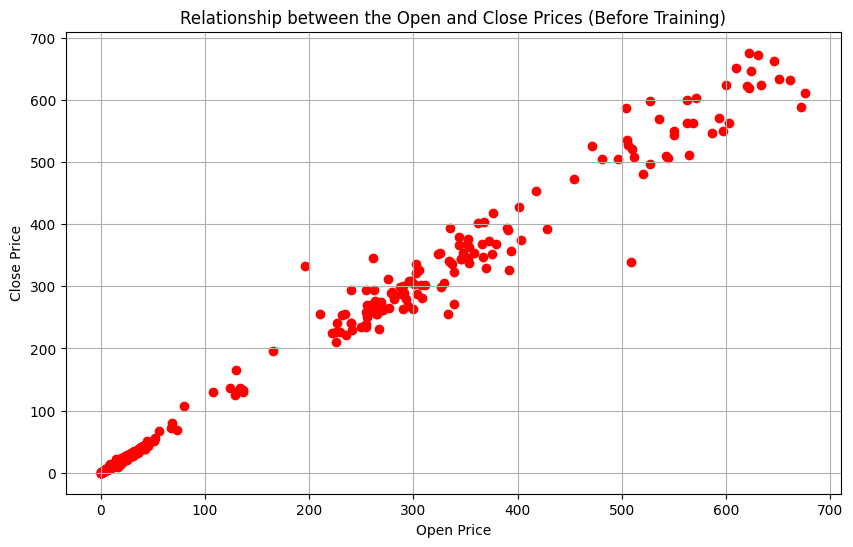

In [251]:
# Create a figure for the plot with specific size
plt.figure(figsize=(10,6))

# Create a scatter plot to visualize the relationship between "open" and "close" prices
plt.scatter(df["open"],df["close"],color='red')
plt.title("Relationship between the Open and Close Prices (Before Training)")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

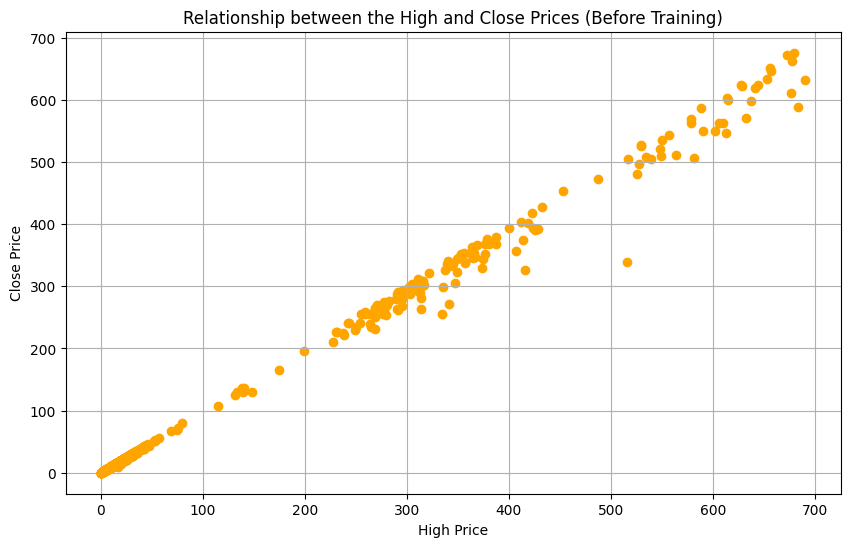

In [252]:
# Create a figure for the plot with specific size
plt.figure(figsize=(10,6))

# Create a scatter plot to visualize the relationship between "open" and "close" prices
plt.scatter(df["high"],df["close"],color='orange')
plt.title("Relationship between the High and Close Prices (Before Training)")
plt.xlabel("High Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

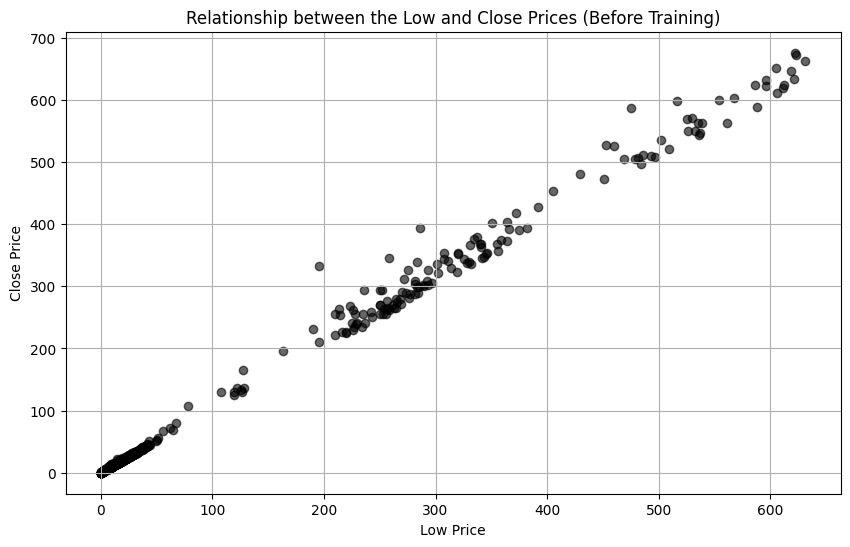

In [253]:
# Create a figure for the plot with specific size
plt.figure(figsize=(10,6))

# Create a scatter plot to visualize the relationship between "open" and "close" prices
plt.scatter(df["low"],df["close"],color='black',alpha=0.6)
plt.title("Relationship between the Low and Close Prices (Before Training)")
plt.xlabel("Low Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

Model Building and Training

In [254]:
# Initialize a dictionary to store different regression models
models = {
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(alpha=0.1),
    "Lasso Regression":Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1,l1_ratio=0.5)
}

# Initialize a dictionary to store the evaluation results (MSE) for eac model
results ={}
best_model = None
lowest_mse = float("inf")

# Loop through each model in the dictionary to train, predict and evaluate it
for name,model in models.items():
    # Train the model using the training data (X_train,y_train)
    model.fit(X_train,y_train)

    # Use the trained model to make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) to evaluate the model's performance
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    results[name] = mse

    # Check if the current model has a lowe MSE than the previous best model
    if mse < lowest_mse:
        lowest_mse = mse
        best_model = model

print("Model Comparison (Mean Squared Error)")
for name,mse in results.items():
    print(f"- {name}: MSE {mse:.4f}, R-Sqaured {r2:.4f}")  

Model Comparison (Mean Squared Error)
- Linear Regression: MSE 8.0230, R-Sqaured 0.9992
- Ridge Regression: MSE 8.0230, R-Sqaured 0.9992
- Lasso Regression: MSE 7.8474, R-Sqaured 0.9992
- ElasticNet Regression: MSE 7.8538, R-Sqaured 0.9992


c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.774e+03, tolerance: 1.640e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.426e+03, tolerance: 1.640e+03
  model = cd_fast.enet_coordinate_descent(


Identify the best model

In [255]:
best_model_name = [name for name,model in models.items() if model == best_model][0]
print(f"The best model is: {best_model_name}")

The best model is: Lasso Regression


Prediction

In [256]:
y_pred_best = best_model.predict(X_test)

Visualization after training

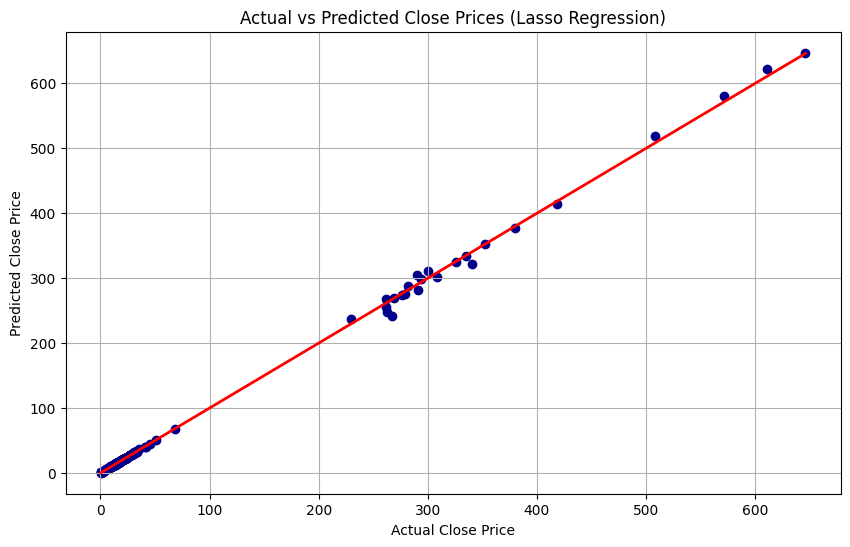

In [257]:
# Create a scatter plot to visulize how well the predicted values match the actual value
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_best,color="darkblue")
plt.title(f"Actual vs Predicted Close Prices ({best_model_name})")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")

# Plot a diagonal line (y=x) to represent a perfect prediction
# The closer the points are to this ine, the better the model's perfotmance
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],lw=2,color="red")
plt.grid(True)
plt.show()

User Input and Prediction

In [ ]:
def predict_with_user_input(model):
    """
    This functon takes user input for open, high and low prices
    and uses the trained model to predict the close price
    """
    try:
        # Prompt the user to enter the required values.
        open_price = float(input("Enter the Open Price:"))
        high_price = float(input("Enter the High Price:"))
        low_price = float(input("Enter the Low Price:"))

        # Create a DataFrame from the user's input, which is the format the model expects
        user_data = pd.DataFrame([[open_price,high_price,low_price]],columns=features)

        # Make a Prediction using the trained model
        predicted_price = model.predict(user_data)

        # Print the predicted price formatted to two decimal places
        print(f"Based on you input, the predicted Close Price is: {predicted_price[0]:.2f}")
    except ValueError:
        print("Invalid input. Please enter valid numbers.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Call the function
predict_with_user_input(model)